

## <center>Data Bootcamp 🚀</center>

<center>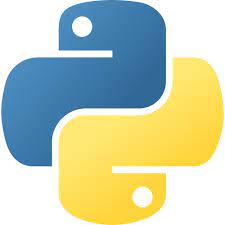</center>

### <center>Session: Linear Regression - Solution </center>

<center>Course provided by:</center>

[<center>Professor Gaëtan Brison</center>](https://github.com/gaetanbrison)
___

# 📈 Linear Regression with Python¶




<center><img src="https://miro.medium.com/v2/resize:fit:1400/0*-P1TLY-tuG09kXDz" width=300 height=200/></center>

## 💾 Data¶

We are going to use the USA_Housing dataset. Since house price is a continuous variable, this is a regression problem. The data contains the following columns:

- 'Avg. Area Income': Avg. The income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in the same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in the same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in the same city
- 'Area Population': The population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house

## 📤 Import Libraries

In [ ]:
pip install hvplot --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 3.3 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import holoviews as hv

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

## 🔎 Check out the Data

In [2]:
USAhousing = pd.read_csv("data/USA_Housing.csv")
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## 📊 Exploratory Data Analysis (EDA)
Let's create some simple plots to check out the data!

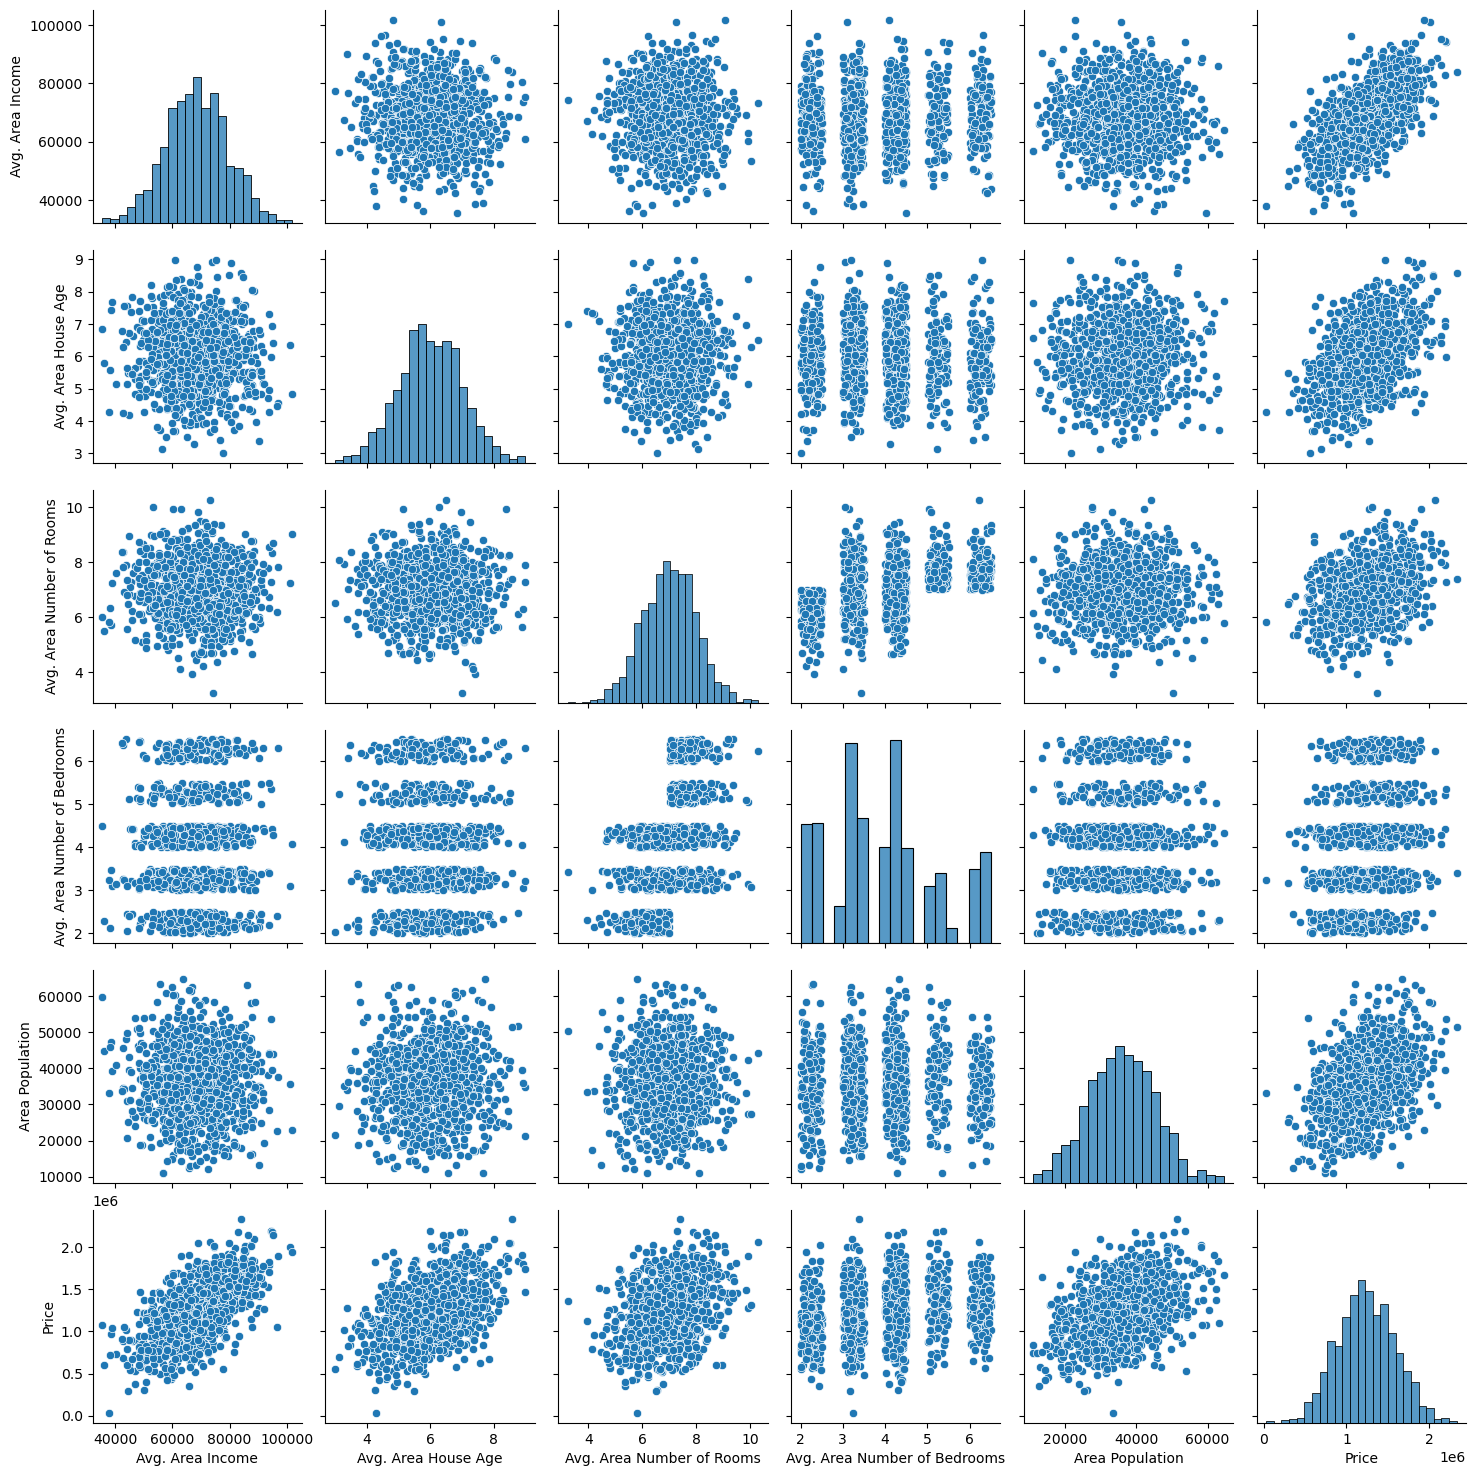

In [10]:
sns.pairplot(data=USAhousing.sample(1000))

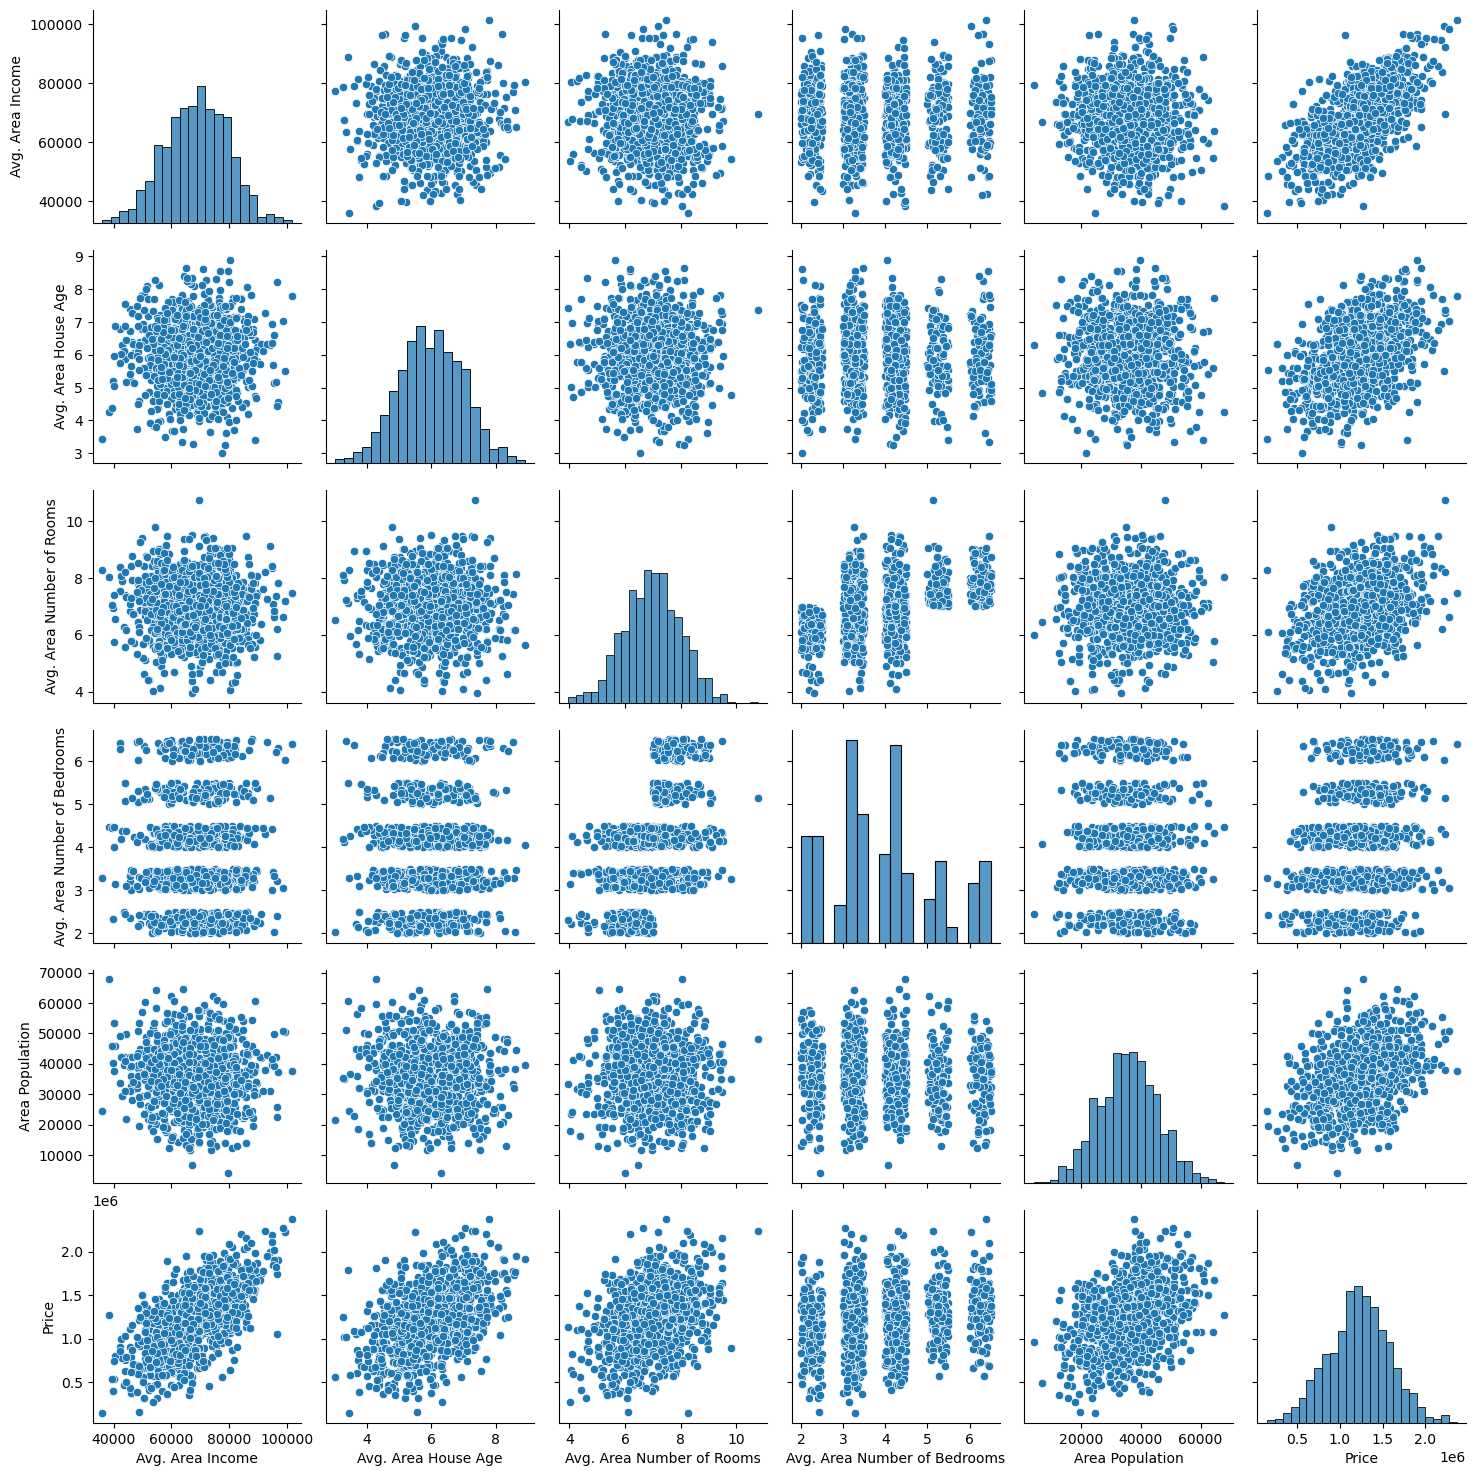

In [11]:
sns.pairplot(data=USAhousing)

In [32]:
USAhousing.hvplot.hist(by="Price", subplots=False, width=1000)

:NdOverlay   [Variable]
   :Histogram   [Area Population]   (Count)

In [13]:
USAhousing.hvplot.hist("Price")

:Histogram   [Price]   (Count)

In [ ]:
USAhousing.hvplot.scatter(x="Avg. Area House Age", y="Price")

:Scatter   [Avg. Area House Age]   (Price)

In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

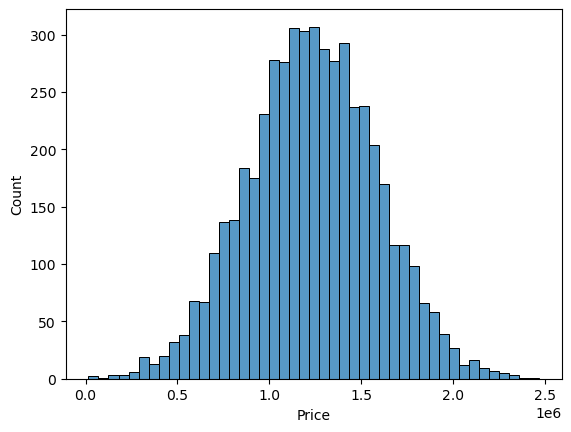

In [17]:
sns.histplot(USAhousing["Price"])

In [29]:
USAhousing.drop(columns=["Address"])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: >

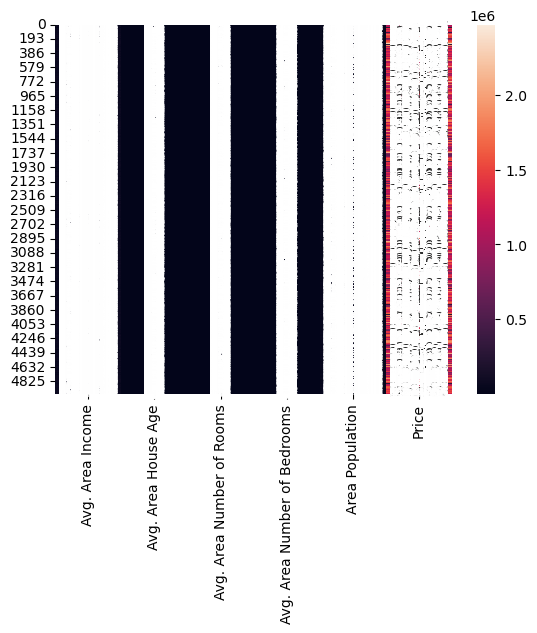

In [30]:
sns.heatmap(USAhousing.drop(columns=["Address"]), annot=True)

## 📈 Training a Linear Regression Model
Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [23]:
X = USAhousing[
    [
        "Avg. Area Income",
        "Avg. Area House Age",
        "Avg. Area Number of Rooms",
        "Avg. Area Number of Bedrooms",
    ]
]
y = USAhousing["Price"]

### 🧱 Train Test Split
Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
USAhousing.shape

(5000, 7)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# instantiate the model
# using linear

LinearRegression()

## Model Evaluation

In [33]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Area Income,21.352290
Avg. Area House Age,162316.237130
Avg. Area Number of Rooms,119964.918113
Avg. Area Number of Bedrooms,-98.020695


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52.

- Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28.

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67.

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80.

- Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15.

Does this make sense? Probably not because I made up this data

✔️ Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [36]:
pred = lin_reg.predict(X_test)

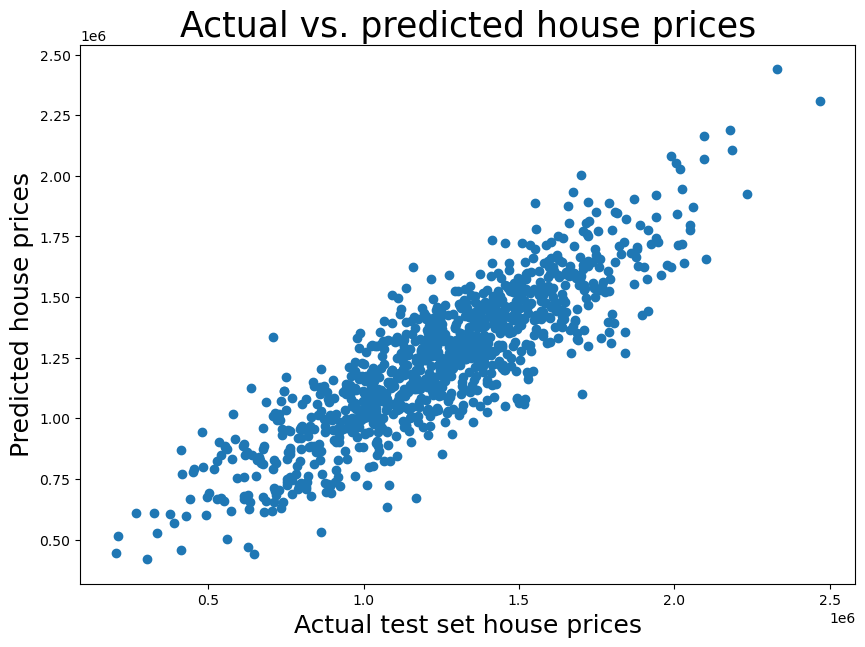

In [37]:
plt.figure(figsize=(10, 7))
plt.title("Actual vs. predicted house prices", fontsize=25)
plt.xlabel("Actual test set house prices", fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test, y=pred)


Residual Histogram

### 🛠 Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [38]:
from sklearn import metrics

In [39]:
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 139506.073900911
MSE: 31167613077.963024
RMSE: 176543.51610286633


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, pred, multioutput="variance_weighted")

0.7466716127211295

## Congratulations you made it 🎉